In [22]:
import sys;
print('system (python) info')
print(sys.version)
print('')

import nltk; print( 'nltk ' + nltk.__version__)
from nltk import word_tokenize;

import bs4; print( 'bs4 ' + bs4.__version__)
from bs4 import BeautifulSoup, SoupStrainer;

import re; print('re ' + re.__version__)
import requests; print('requests ' + requests.__version__)

import sklearn; print( 'sklearn ' + sklearn.__version__)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix

import pandas as pd; print( 'pandas ' + pd.__version__)

import seaborn as sn; print( 'seaborn ' + sn.__version__)

import matplotlib; print( 'matplotlib ' + matplotlib.__version__)
import matplotlib.pyplot as plt

system (python) info
3.6.0 |Anaconda custom (x86_64)| (default, Dec 23 2016, 13:19:00) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]

nltk 3.2.2
bs4 4.5.3
re 2.2.1
requests 2.18.4
sklearn 0.18.1
pandas 0.19.2
seaborn 0.7.1
matplotlib 2.0.0


# Write Up

The Amazon search was for the term [success](https://www.amazon.com/s/ref=sr_nr_n_18?fst=as%3Aoff&rh=n%3A283155%2Ck%3Asucces&keywords=succes&ie=UTF8&qid=1541269254&rnid=2941120011)

### Question 1
Using cosine similarity (code below), there are two titles that are completely identical and to each other (value of 1). Both books have the title "Les 7 lois spirituelles du succès (French Edition)".

The titles that are most dissimilar are:

> non, mon mariage ne sera pas un echec: prieres contre les esprits qui detruisent les mariages (mariage spirituel, succes est un choix, emotion invincible, ... maledictions, sexualite) (French Edition)

And:

> BOLD! Life Skills and Goal Success System. Prosper with Passion, Purpose & Personal Power. Self Help Personal Development.: Self Development. How to be Successful. Create Prosperity, Abundance & Joy

Obviously the French titles are going to cause a lot of difference between the titles.

### Question 2

Using the title "le succès par la pensée constructive" on a google search I have come up with the first and 20th result respectively:

 - **le succès par la pensée constructive [Napoleon Hill] on Amazon.com. *FREE* shipping on qualifying offers.** (First result)
 - **Titre : Le Succès par la pensée constructive. Date de parution : février 2007. Éditeur : HOMME. Sujet : PSYCHOLOGIE POPULAIRE. ISBN : 9782761923767** (Twentieth result)
 
The cosine similarity between these two results are pretty similar with 0.385372 (for the first), and 0.372386 (for the second). With the first result having a slight advantage.


## Code

In [3]:
# https://www.amazon.com/s/ref=sr_nr_n_18?fst=as%3Aoff&rh=n%3A283155%2Ck%3Asucces&keywords=succes&ie=UTF8&qid=1541269254&rnid=2941120011
titles = [
    # page 1
    "Positive Thinking: Happiness and Success Follow Optimism (Destroy Stress and Self-Doubt) (Positive Thinking, Happiness, techniques, power of positive thinking, health, success,quotes)",
    "Les Sept Lois Spirituelles Du Succes. (Aventure Secrete) (English and French Edition)",
    "L'ETAT D'ESPRIT POUR ENTREPRENDRE: Réveillez l'entrepreneur à succès qui est en vous ! (French Edition)",
    "Working With the Law - Original: 11 principles for succes in life - FULL BOOK",
    "Five Secrets of Compelling People: How to Have a Powerful, Irresistible Effect and Gain Respect Instantly (book about personal development, succes principles, ... respect, leadership, power, influence)",
    "COACHING :Coaching Questions Powerful Coaching Questions To Kickstart Personal Growth And Succes Now ! - Life Coaching,Life Coach, Success Principles,Success Habits-",
    "Five Secrets Of Happy People: How To Be Happy, Stay Happy And Live Happily Ever After (personal development, succes principles, happier at home, succesful people, happiness project)",
    "le succès par la pensée constructive",
    "A Woman's Guide to Personal Achievement & Professional Succes",
    "non, mon mariage ne sera pas un echec: prieres contre les esprits qui detruisent les mariages (mariage spirituel, succes est un choix, emotion invincible, ... maledictions, sexualite) (French Edition)",
    "Des associés qui cartonnent: Comment et pourquoi s'associer avec succès (French Edition)",
    "CONSEILS POUR ÊTRE UN ÉTUDIANT DE SUCCÈS: Tout le monde est un génie en potentiel. Il suffit de le réveiller chez nous! (French Edition)",
    # page 2
    "LES BASES DU SUCCES: développement personnel - 60 pages indispensables pour réussir et devenir riche. Appliquez des principes simples pour réaliser vos objectifs et surperformer. (French Edition)",
    "Les Lois Du Succès Spirituel (volume Un) (French Edition)",
    "Les 7 lois spirituelles du succès (French Edition)",
    "Les 7 lois spirituelles du succès (French Edition)",
    "Le Secret du Succès: Un cours en 9 leçons sur la mise en pratique des pouvoirs latents de l'individu pour réussir dans la vie. (French Edition)",
    "Comment écrire son premier roman ?: Découvrez les secrets pour devenir un écrivain à succès (French Edition)",
    "Wealth: Succes Tips for Entrepreneurs & Business Owners",
    "LES BASES DU SUCCES ET DE L'ENRICHISSEMENT FINANCIER: développement personnel : apprenez comment devenir riche (French Edition)",
    "Clefs de Succès Pour Maximiser Chaque Nouvelle Année (French Edition)",
    "Le Système-clé Universel du Succès - Charles Haanel - The Master Key System (traduit) (Les guides pratiques de la Web-librairie.com) (French Edition)",
    "le succes est un choix: les secrets du succes dans la vie (gestion du temps. sexualite, emotions, non mon mariage ne sera pas un echec, reussir son mariage, ... combats, delivrance) (French Edition)",
    "BOLD! Life Skills and Goal Success System. Prosper with Passion, Purpose & Personal Power. Self Help Personal Development.: Self Development. How to be Successful. Create Prosperity, Abundance & Joy",
]

In [4]:
len(titles)

24

In [41]:
def compare_titles(titles):
    # used with assistance from https://stackoverflow.com/questions/8897593/similarity-between-two-text-documents
    tfidf = TfidfVectorizer(min_df=1).fit_transform(titles)
    pairwise_similarity = (tfidf * tfidf.T).toarray()
    pairwise_df = pd.DataFrame(pairwise_similarity)
    sn.heatmap(pairwise_df)
    plt.show()
    return pairwise_df

/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


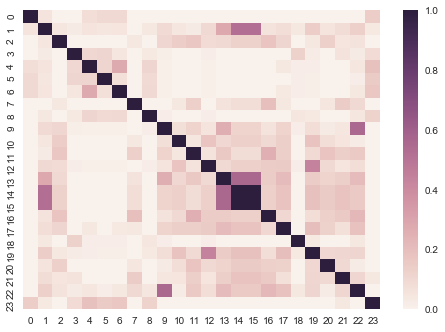

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1.000000,0.053736,0.000000,0.000000,0.077018,0.099635,0.094713,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.144342
1,0.053736,1.000000,0.043587,0.028639,0.054687,0.043988,0.046898,0.000000,0.040868,0.089865,...,0.527087,0.527087,0.055197,0.076155,0.037929,0.141082,0.050936,0.083404,0.131068,0.031723
2,0.000000,0.043587,1.000000,0.000000,0.000000,0.000000,0.000000,0.039414,0.000000,0.108076,...,0.127397,0.127397,0.174459,0.109686,0.000000,0.036389,0.131513,0.046924,0.060385,0.000000
3,0.000000,0.028639,0.000000,1.000000,0.104551,0.111242,0.045013,0.000000,0.032660,0.015622,...,0.000000,0.000000,0.000000,0.000000,0.128465,0.023909,0.000000,0.058089,0.030199,0.087147
4,0.077018,0.054687,0.000000,0.104551,1.000000,0.110285,0.279784,0.000000,0.112847,0.010974,...,0.000000,0.000000,0.000000,0.038818,0.021293,0.016796,0.000000,0.000000,0.045236,0.189360
5,0.099635,0.043988,0.000000,0.111242,0.110285,1.000000,0.069350,0.000000,0.090770,0.008827,...,0.000000,0.000000,0.000000,0.000000,0.017127,0.013510,0.000000,0.000000,0.017064,0.152314
6,0.094713,0.046898,0.000000,0.045013,0.279784,0.069350,1.000000,0.000000,0.096775,0.009411,...,0.000000,0.000000,0.000000,0.033289,0.018260,0.014404,0.000000,0.000000,0.038793,0.167452
7,0.000000,0.000000,0.039414,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.076677,0.076677,0.199054,0.038415,0.000000,0.000000,0.046059,0.147539,0.100414,0.000000
8,0.000000,0.040868,0.000000,0.032660,0.112847,0.090770,0.096775,0.000000,1.000000,0.022293,...,0.000000,0.000000,0.000000,0.000000,0.043255,0.034119,0.000000,0.000000,0.043094,0.123752
9,0.000000,0.089865,0.108076,0.015622,0.010974,0.008827,0.009411,0.000000,0.022293,1.000000,...,0.119581,0.119581,0.055638,0.117145,0.020690,0.075025,0.027785,0.044045,0.552353,0.000000


In [42]:
compare_titles(titles)

In [28]:
titles[13:16]

['Les Lois Du Succès Spirituel (volume Un) (French Edition)',
 'Les 7 lois spirituelles du succès (French Edition)',
 'Les 7 lois spirituelles du succès (French Edition)']

In [31]:
print(titles[14])
print(titles[0])

Les 7 lois spirituelles du succès (French Edition)
Positive Thinking: Happiness and Success Follow Optimism (Destroy Stress and Self-Doubt) (Positive Thinking, Happiness, techniques, power of positive thinking, health, success,quotes)


In [32]:
print(titles[9])
print(titles[23])

non, mon mariage ne sera pas un echec: prieres contre les esprits qui detruisent les mariages (mariage spirituel, succes est un choix, emotion invincible, ... maledictions, sexualite) (French Edition)
BOLD! Life Skills and Goal Success System. Prosper with Passion, Purpose & Personal Power. Self Help Personal Development.: Self Development. How to be Successful. Create Prosperity, Abundance & Joy


Javascript used for scraping:

```javascript
output = ""
blocks = Array.from(document.querySelectorAll('.s-result-item.celwidget')).slice(-12)
blocks
	.map(block => block.querySelector('h2').innerText)
	.forEach(block => {
	output += (`"${block}",\n`);
	})
output

```

## Code for Question 2

In [39]:
titles_google = [
    'le succès par la pensée constructive', # Original title searched on Google
    'le succès par la pensée constructive [Napoleon Hill] on Amazon.com. *FREE* shipping on qualifying offers.',
    'Titre : Le Succès par la pensée constructive. Date de parution : février 2007. Éditeur : HOMME. Sujet : PSYCHOLOGIE POPULAIRE. ISBN : 9782761923767'    
]

/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


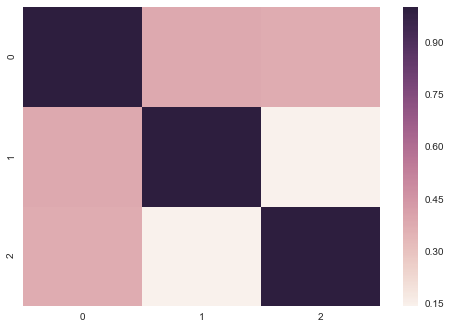

,0,1,2
0,1.000000,0.385372,0.372386
1,0.385372,1.000000,0.143507
2,0.372386,0.143507,1.000000


In [43]:
compare_titles(titles_google)